<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
 -The input layer is where the data is entering the network 
### Hidden Layer:
 -The hidden layers take output from the input layers and do their own computations. They're called hidden layers because 
 we don't directly interact with them.
### Output Layer:
 -The output layer is the final layer(in most cases) it is the data that is formated for the problem that is trying to be solved.
 This is the answer in the end after all the computation.
### Neuron:
 -A neuron has an input it multiplies input by the weight and then outputs some data that then gets passed on to an activation function 
### Weight:
 -Weight is how much a input data gets multiplied by the weight. I imagine it's similar to a coefficient. 
### Activation Function:
 -The actvation function describes whether the node is on or not, or how on it is.
### Node Map:
 -A node map is a visual representation of the neural network and what each node is.
### Perceptron:
 -Is a neural network that has an input layer and an output layer. 

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

The input nodes take in data those nodes then pass on that data to the hidden nodes that multiply the data by the weight of that hidden node. That gets put into an activation function, which
determines if the node is on or off, or how on or off it is(not binary)

## Write your own perceptron code that can correctly classify a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [146]:
class Perceptron(object):
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self

    def net_input(self, X):
        
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [154]:
import numpy as np
X = np.array([[0,0],
              [1,0],
              [0,1],
              [1,1]])

y = [1, 1, 1, 0]

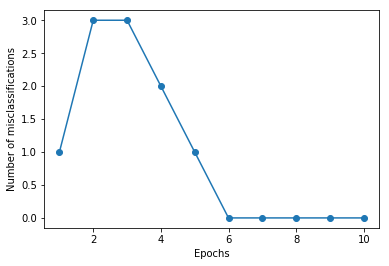

In [155]:
import matplotlib.pyplot as plt
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [156]:
pn.predict(X)

array([1, 1, 1, 0])

## Implement your own Perceptron Class and use it to classify a binary dataset like: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 
- [Titanic](https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv)
- [A two-class version of the Iris dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Iris.csv)

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [226]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/titanic.csv')
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [237]:
tn = titanic[['adult_male', 'age','survived']]

In [ ]:
tn['binary_male'] = tn['adult_male'].astype('int')

In [ ]:
tn['ones'] = np.ones(len(tn['age']))

In [241]:
from sklearn import preprocessing

N = tn[['age']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(N)
df_normalized = pd.DataFrame(x_scaled)

In [ ]:
tn['norm_age'] = df_normalized[0]

In [272]:
tn['norm_age'][:10]

0     0.271174
1     0.472229
2     0.321438
3     0.434531
4     0.434531
6     0.673285
7     0.019854
8     0.334004
9     0.170646
10    0.044986
Name: norm_age, dtype: float64

In [244]:
tn = tn.dropna()
tn.shape

(714, 6)

In [245]:
y = np.array(tn['survived'])
y[:10]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [248]:
X = np.array((tn[['binary_male','norm_age','ones']]), dtype='float')

In [249]:
X

array([[1.        , 0.27117366, 1.        ],
       [0.        , 0.4722292 , 1.        ],
       [0.        , 0.32143755, 1.        ],
       ...,
       [0.        , 0.23347575, 1.        ],
       [1.        , 0.32143755, 1.        ],
       [1.        , 0.39683338, 1.        ]])

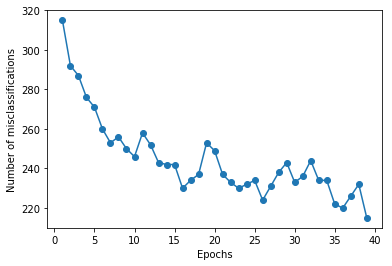

In [260]:
pn = Perceptron(0.01, 39)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

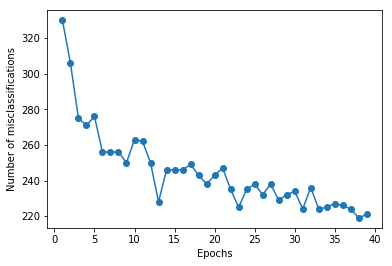

In [261]:
X = np.array((tn[['binary_male','age','ones']]), dtype='int')
pn = Perceptron(0.01, 39)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [262]:
X

array([[ 1, 22,  1],
       [ 0, 38,  1],
       [ 0, 26,  1],
       ...,
       [ 0, 19,  1],
       [ 1, 26,  1],
       [ 1, 32,  1]])

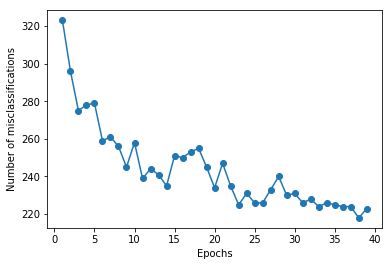

In [263]:
X = np.array((tn[['binary_male','age']]), dtype='int')
pn = Perceptron(0.01, 39)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?